In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_ufc_master = pd.read_csv('ufc-master.csv')

In [3]:
def AmericanToPercent(odds):
    if(odds > 0):
        decimal = 100/((odds+100))
    else:
        decimal = abs(odds)/(abs(odds)+100)
    return decimal

def TrueOdds(odds1, odds2):
    return odds1/(odds1+odds2)

In [4]:
# df_ufc_master[['R_odds','B_odds','Winner']]
df_ufc_master['R_pcnt'] = df_ufc_master['R_odds'].apply(AmericanToPercent)
df_ufc_master['B_pcnt'] = df_ufc_master['B_odds'].apply(AmericanToPercent)
df_ufc_master['R_true_odds'] = df_ufc_master.apply(lambda row: TrueOdds(row['R_pcnt'], row['B_pcnt']), axis=1)

In [5]:
df = df_ufc_master[['R_odds','B_odds','Winner','R_pcnt','B_pcnt','R_true_odds']].copy()

# for column in df_ufc_master.columns:
#     print(column)

In [6]:
df['Winner_binary'] = df['Winner'].apply(lambda winner: 1 if winner == 'Red' else 0)

In [7]:
# Redefine the true_odds_probability_range function
def true_odds_probability_range(true_odds):
    if true_odds >= 0.95:
        return '95-100%'
    elif true_odds >= 0.90:
        return '90-95%'
    elif true_odds >= 0.85:
        return '85-90%'
    elif true_odds >= 0.80:
        return '80-85%'
    elif true_odds >= 0.75:
        return '75-80%'
    elif true_odds >= 0.70:
        return '70-75%'
    elif true_odds >= 0.65:
        return '65-70%'
    elif true_odds >= 0.60:
        return '60-65%'
    elif true_odds >= 0.55:
        return '55-60%'
    elif true_odds >= 0.50:
        return '50-55%'
    elif true_odds >= 0.45:
        return '45-50%'
    elif true_odds >= 0.40:
        return '40-45%'
    elif true_odds >= 0.35:
        return '35-40%'
    elif true_odds >= 0.30:
        return '30-35%'
    elif true_odds >= 0.25:
        return '25-30%'
    elif true_odds >= 0.20:
        return '20-25%'
    elif true_odds >= 0.15:
        return '15-20%'
    elif true_odds >= 0.10:
        return '10-15%'
    elif true_odds >= 0.05:
        return '05-10%'
    elif true_odds >= 0.00:
        return '00-05%'

# Apply the probability range function to the true odds
df['R_true_odds_range'] = df['R_true_odds'].apply(true_odds_probability_range)

# Group by the true odds range and calculate the accuracy
true_odds_accuracy_df = df.groupby('R_true_odds_range')['Winner_binary'].agg(['mean', 'count']).reset_index().rename(columns={'mean': 'Accuracy', 'count': 'Total'})
true_odds_accuracy_df = true_odds_accuracy_df.sort_values(by='R_true_odds_range', ascending=False)


In [11]:
true_odds_accuracy_df['Total'].sum()

4895

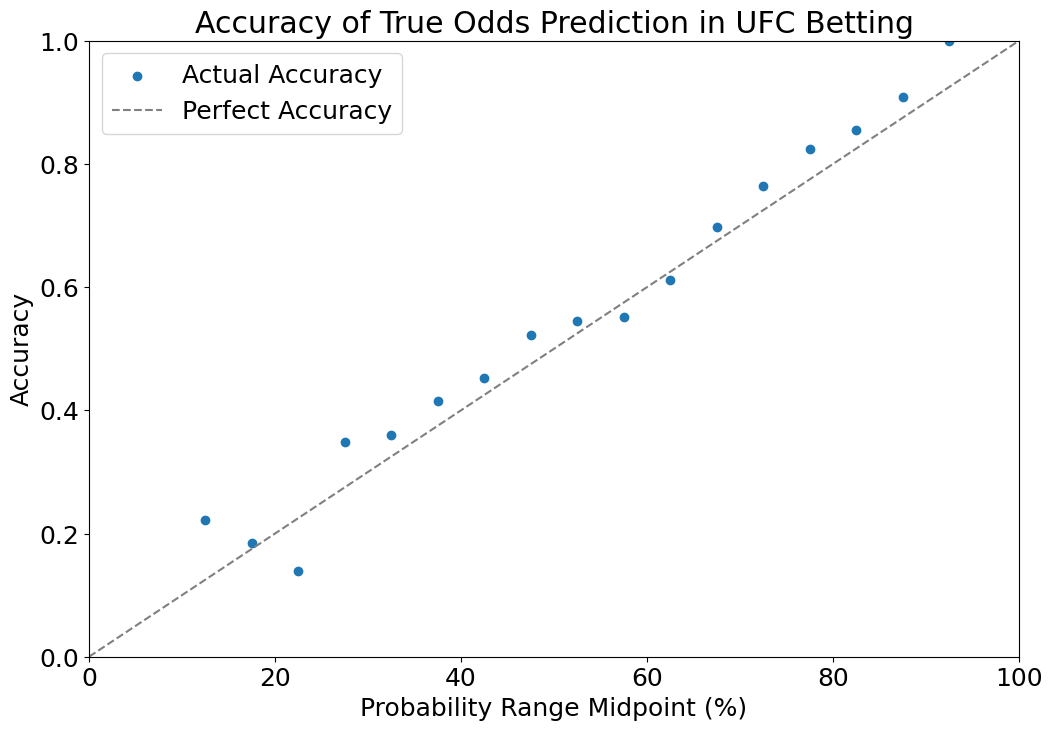

In [10]:
# Converting the probability range labels into numerical format for plotting
probability_range_mapping = {
    '00-05%': 2.5, '05-10%': 7.5, '10-15%': 12.5, '15-20%': 17.5,
    '20-25%': 22.5, '25-30%': 27.5, '30-35%': 32.5, '35-40%': 37.5,
    '40-45%': 42.5, '45-50%': 47.5, '50-55%': 52.5, '55-60%': 57.5,
    '60-65%': 62.5, '65-70%': 67.5, '70-75%': 72.5, '75-80%': 77.5,
    '80-85%': 82.5, '85-90%': 87.5, '90-95%': 92.5, '95-100%': 97.5
}

# Apply the mapping to the DataFrame
true_odds_accuracy_df['R_true_odds_midpoint'] = true_odds_accuracy_df['R_true_odds_range'].map(probability_range_mapping)

# Creating a plot
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 18})

# Plotting the accuracy of each probability range
plt.scatter(true_odds_accuracy_df['R_true_odds_midpoint'], true_odds_accuracy_df['Accuracy'], label='Actual Accuracy')

# Adding labels and title
plt.xlabel('Probability Range Midpoint (%)')
plt.ylabel('Accuracy')
plt.title('Accuracy of True Odds Prediction in UFC Betting')

# Adding a diagonal line representing y=x
plt.plot([0, 100], [0, 1], linestyle='--', color='gray', label='Perfect Accuracy')

# Setting the limits for clarity
plt.xlim(0, 100)
plt.ylim(0, 1)

# Adding a legend
plt.legend()

# Show the plot
plt.show()
